## Dataset
This dataset is synthetically generated and contains 5 features and a target label:
- `feature_1` to `feature_5`: Numerical features
- `personality_type`: Target (0 = introvert, 1 = extrovert)

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder





Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("personality_dataset.csv")

In [3]:
print("First 5 rows:")
print(df.head())
print("\nData Summary:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows:
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29

In [4]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Personality'])

In [5]:
X = df.drop(columns=['Personality', 'label'])
y = df['label']

In [6]:
X_encoded = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
y_pred = model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[276  26]
 [ 20 258]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       302
           1       0.91      0.93      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



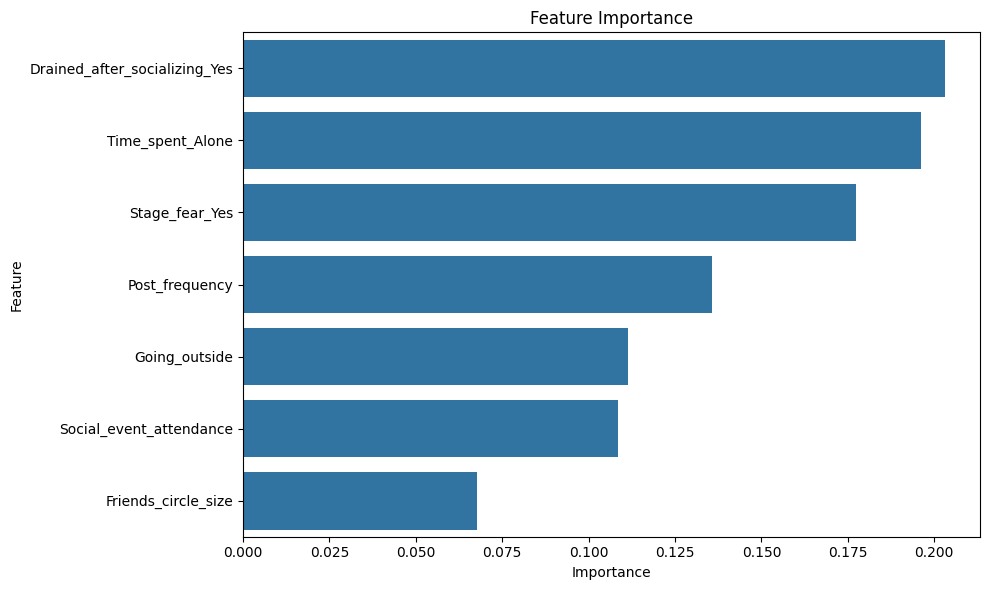

In [11]:
importances = model.feature_importances_
feature_names = X_encoded.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [12]:

def predict_personality(new_data_dict):
    new_df = pd.DataFrame([new_data_dict])

    new_df_encoded = pd.get_dummies(new_df, drop_first=True)
    new_df_encoded = new_df_encoded.reindex(columns=X_encoded.columns, fill_value=0)

    new_df_scaled = scaler.transform(new_df_encoded)

    prediction_num = model.predict(new_df_scaled)

    personality_str = label_encoder.inverse_transform(prediction_num)

    return personality_str[0]

In [13]:
new_person = {
    'Time_spent_Alone': 100,
    'Stage_fear': 'No',
    'Social_event_attendance': 'Always',
    'Going_outside': 'Yes',
    'Drained_after_socializing': 'Yes',
    'Friends_circle_size': 100,
    'Post_frequency': 3
}

predicted_personality = predict_personality(new_person)
print(f"\nPredicted personality for new person: {predicted_personality}")


Predicted personality for new person: Introvert


In [14]:
import joblib
import json
import os

os.makedirs('model', exist_ok=True)

joblib.dump(model, 'model/model.pkl')

joblib.dump(scaler, 'model/scaler.pkl')

joblib.dump(label_encoder, 'model/label_encoder.pkl')

with open('model/columns.json', 'w') as f:
    json.dump(X_encoded.columns.tolist(), f)
